In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/Akif/Desktop/football/data_3615.csv")
data.shape

(3614, 16)

In [ ]:
data = data.drop(data[data['home_position_to_goal'] > 1].index)
data = data.drop(data[data['away_position_to_goal'] > 1].index)

In [3]:
target_columns = ['result']
feature_columns = ['own_goals', 'own_position', 'opponent_goals', 'opponent_position', 'home_total_market_value', 'home_key_players', 'away_total_market_value', 'away_key_players', 'home_position_to_goal', 'away_position_to_goal', 'home_win_h2h', 'home_home_win', 'away_away_win', 'home_last_5_game_win', 'away_last_5_game_win']

In [4]:
X = data[feature_columns].values
y = data[target_columns].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 2312
Validation set size: 579
Testing set size: 723


In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Akif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
37/37 - 2s - 62ms/step - accuracy: 0.3802 - loss: 1.7460 - val_accuracy: 0.4180 - val_loss: 1.0452
Epoch 2/50
37/37 - 0s - 5ms/step - accuracy: 0.4187 - loss: 1.5993 - val_accuracy: 0.4750 - val_loss: 0.9956
Epoch 3/50
37/37 - 0s - 5ms/step - accuracy: 0.4563 - loss: 1.4525 - val_accuracy: 0.5371 - val_loss: 0.9445
Epoch 4/50
37/37 - 0s - 5ms/step - accuracy: 0.5134 - loss: 1.2912 - val_accuracy: 0.5838 - val_loss: 0.8848
Epoch 5/50
37/37 - 0s - 4ms/step - accuracy: 0.5229 - loss: 1.1645 - val_accuracy: 0.6304 - val_loss: 0.8150
Epoch 6/50
37/37 - 0s - 5ms/step - accuracy: 0.5281 - loss: 1.1756 - val_accuracy: 0.6701 - val_loss: 0.7428
Epoch 7/50
37/37 - 0s - 4ms/step - accuracy: 0.5506 - loss: 1.1008 - val_accuracy: 0.6960 - val_loss: 0.6814
Epoch 8/50
37/37 - 0s - 5ms/step - accuracy: 0.5748 - loss: 1.0572 - val_accuracy: 0.7271 - val_loss: 0.6244
Epoch 9/50
37/37 - 0s - 4ms/step - accuracy: 0.6073 - loss: 0.9762 - val_accuracy: 0.7530 - val_loss: 0.5778
Epoch 10/50
37/37 

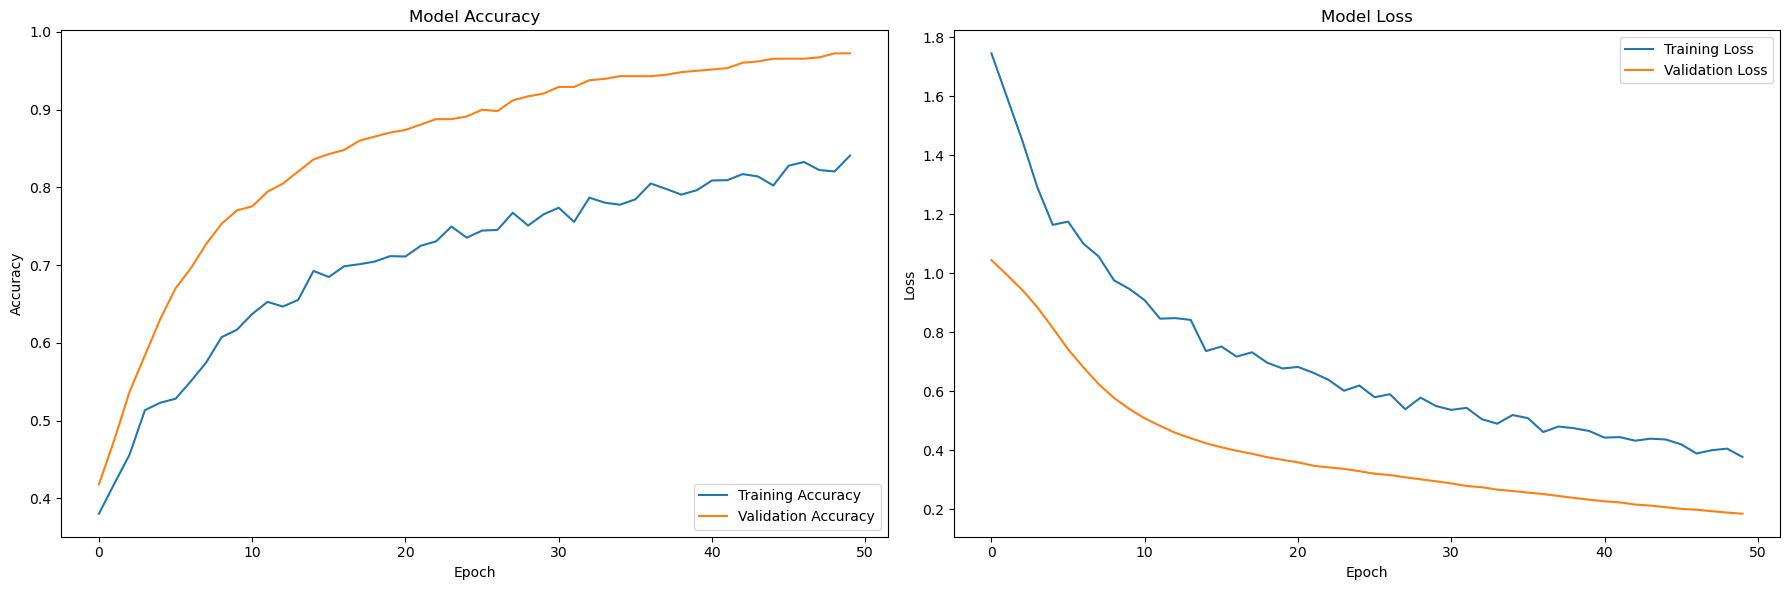

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')


axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')


plt.tight_layout()
plt.show()

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.1804 
Test Loss: 0.1829199194908142
Test Accuracy: 0.9709543585777283


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


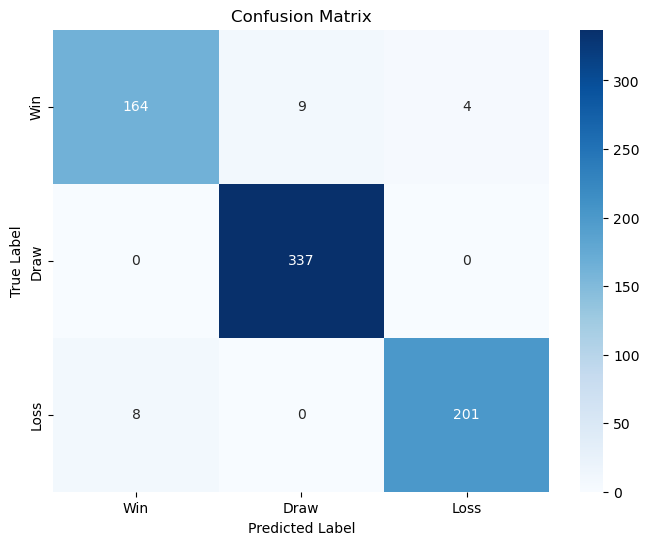

In [12]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ['Win', 'Draw', 'Loss']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()